In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

# 전체 입력은 4차원, 출력은 3클래스: 정수(0, 1, 2)로 되어있음
iris = load_iris()
x = iris.data 
y = iris.target
N,D = x.shape

# 입력은 3개만 사용: (bias, x[0], x[1])
# 출력은 binary로:  0인지 아닌지
x = np.hstack([np.ones((N,1)), x[:,0:2]])
N,D = x.shape

# class +1 : sample은 black, decision region은 gray
# class -1 : sample은 red, decision region은 white
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = -1
print(t)
# sign( w^t x ) = t_pred
def drawPerceptron(w, x, t_pred, t):
    res = 512 
    
    x1_new = np.linspace(np.min(x[:,1]),np.max(x[:,1]),res)
    x2_new = np.linspace(np.min(x[:,2]),np.max(x[:,2]),res)
    xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)
    
    y_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
    
    id_misclass = np.where(t_pred*t < 0)

    cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
    cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])
    
    plt.figure()
    plt.pcolormesh(xx1_new, xx2_new, y_new > 0, cmap = cmap_region, vmin = 0.0, vmax = 1.0)
    plt.scatter(x[:,1], x[:,2], c = t, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
    plt.scatter(x[id_misclass,1], x[id_misclass,2], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


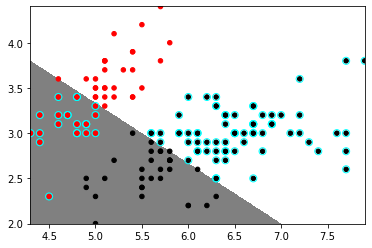

In [11]:
# 선택한 2개 입력 + bias = 3차원 입력
w = np.array([-10, 1.0, 1.5])
t_pred = np.sign( x.dot(w) )
drawPerceptron(w, x, t_pred, t)

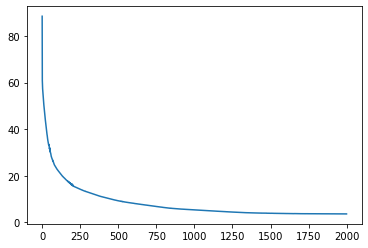

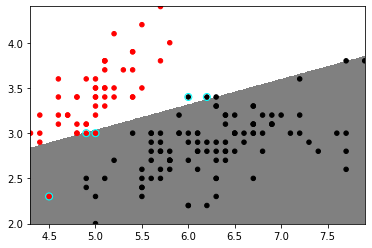

In [14]:
# perceptron, batch gradient descent

# hyperparameter
eta = 5e-4 # learning rate
maxEpoch = 2000

cost = []

# initialization
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):
    # w, x -> prediction
    y_pred = x.dot(w)
    t_pred = np.sign( y_pred )
    
#     # visualize
#     if epoch % 100 == 0:
#         drawPerceptron(w, x, t_pred, t)

    # misclassified pattern
    id_misclass = np.where( y_pred * t < 0 )[0]
#     id_misclass = np.random.permutation(id_misclass)

    # cost
    cost.append(-np.sum( y_pred[id_misclass]*t[id_misclass] ))

    for n in id_misclass:
        grad = t[n] * x[n,:]
        w = w + eta * grad        
        
plt.figure()
plt.plot(cost)

drawPerceptron(w, x, t_pred, t)

13
115
2
117
54
112
117
30
51
118
124
2
130
22
41
42
49
13
100
104
136
16
4
130
34
48
77
38
129
48
7
6
8
65
43
130
74
112
141
41
48
1
39
85
104
1
143
24
26
65
130
144
21
136
4
31
3
85
28
40
124
143
22
12
35
145
7
130
9
24
75
100
13
141
102
20
117
21
36
130
124
12
131
22
10
45
22
9
8
140
120
42
40
17
26
38
110
30
25
138
77
124
1
9
117
30
51
28
38
74
86
50
2
102
148
39
65
144
47
136
109
47
22
30
120
4
120
131
44
27
131
34
36
19
24
136
1
125
148
13
109
20
42
12
110
143
23
50
37
1
11
115
1
13
131
136
9
1
7
107
130
50
48
1
35
131
8
41
47
70
45
104
38
1
137
148
13
34
45
117
105
107
2
45
42
8
11
58
3
124
47
24
143
74
7
131
20
105
0
75
20
117
52
0
38
39
65
20
42
124
38
9
9
42
74
100
148
3
76
23
115
29
75
135
40
13
100
45
47
49
116
39
120
110
34
56
52
1
22
6
45
110
50
12
120
100
135
117
36
6
38
50
25
22
47
11
29
52
124
9
26
100
20
144
141
136
22
34
17
124
85
47
34
9
129
52
6
28
38
102
105
1
35
2
130
3
102
29
47
110
148
39
25
24
109
86
109
42
43
45
115
115
43
39
110
22
41
77
109
40
24
129
56
8
1

1
85
85
1
41
41
41
85
25
131
148
1
45
85
85
45
1
85
12
45
41
109
25
85
1
136
1
85
45
117
12
1
131
1
41
136
148
41
148
1
148
85
9
41
8
117
8
12
25
85
25
117
148
85
8
12
12
136
41
85
1
25
41
109
117
45
148
8
1
117
1
85
8
25
148
12
136
12
85
12
85
41
25
85
41
85
45
117
41
25
117
25
41
136
85
1
45
136
25
148
85
12
45
85
85
34
8
12
148
45
117
8
41
25
117
41
148
85
1
1
136
85
12
45
1
136
85
12
12
148
85
41
12
1
41
148
25
109
117
12
85
25
1
148
41
1
148
1
117
41
148
25
25
148
25
117
25
148
12
85
12
41
136
1
136
85
25
85
8
25
148
12
41
117
85
8
41
25
148
41
136
1
148
12
1
25
136
25
117
41
85
85
12
148
41
1
41
85
85
85
1
8
1
148
41
148
41
1
148
1
85
1
148
45
25
85
25
117
1
25
148
25
85
148
12
148
1
41
136
1
85
12
41
148
25
136
85
85
8
12
12
1
117
1
25
85
41
117
25
41
109
25
148
148
1
85
12
1
117
1
25
85
25
85
25
148
25
85
1
85
12
148
41
1
41
85
136
85
85
34
45
85
25
45
85
45
25
148
25
148
25
25
148
41
117
85
12
85
45
85
8
8
41
25
117
25
136
41
25
41
131
117
41
148
1
85
45
41
148
1
136
25
25
85


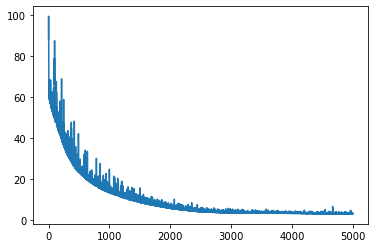

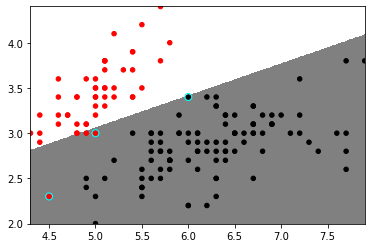

In [4]:
# perceptron, stochastic gradient descent

# hyperparameter
eta = 5e-3 # learning rate
maxEpoch = 5000

cost = []

# initialization
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):
    # w, x -> prediction
    y_pred = x.dot(w)
    t_pred = np.sign( y_pred )
    
#     # visualize
#     if epoch % 100 == 0:
#         drawPerceptron(w, x, t_pred, t)

    # misclassified pattern
    id_misclass = np.where( y_pred * t < 0 )[0]
    id_misclass = np.random.permutation(id_misclass)

    # cost
    cost.append(-np.sum( y_pred[id_misclass]*t[id_misclass] ))

    if id_misclass.size > 0:
        grad = t[id_misclass[0]] * x[id_misclass[0],:]
        w = w + eta * grad        
    else:
        break
        
plt.figure()
plt.plot(cost)

drawPerceptron(w, x, t_pred, t)

In [5]:
# class +1 : sample은 black, decision region은 gray
# class 0: sample은 red, decision region은 white
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = 0

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

def drawLogistic(w, x, y, t):
    res = 512 
    
    x1_new = np.linspace(np.min(x[:,1]),np.max(x[:,1]),res)
    x2_new = np.linspace(np.min(x[:,2]),np.max(x[:,2]),res)
    xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)
    
    a_new = w[0] + w[1]*xx1_new + w[2]*xx2_new    
    y_new = sigmoid(a_new)

    cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
    cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])
    
    plt.figure()
    plt.pcolormesh(xx1_new, xx2_new, y_new > 0.5, cmap = cmap_region, vmin = 0.0, vmax = 1.0)
    plt.scatter(x[:,1], x[:,2], c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

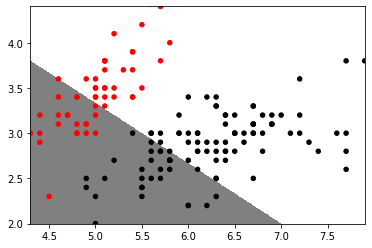

In [6]:
w = np.array([-10, 1.0, 1.5])
a_pred = x.dot(w)
y_pred = sigmoid(a_pred)
drawLogistic(w, x, y_pred, t)

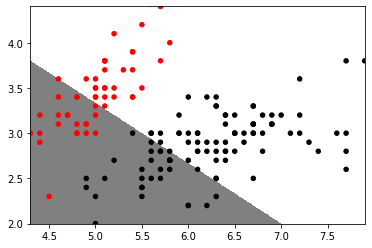

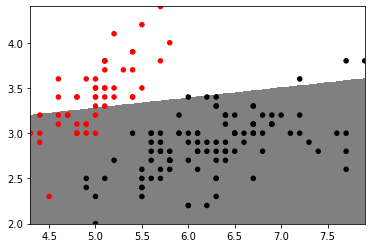

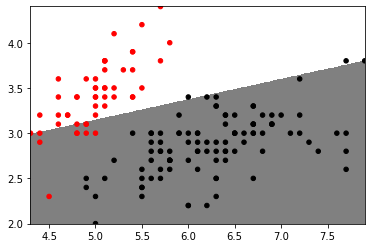

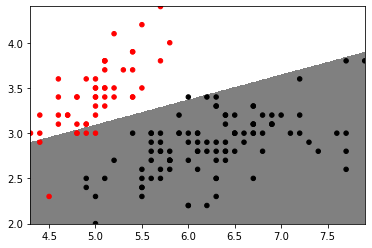

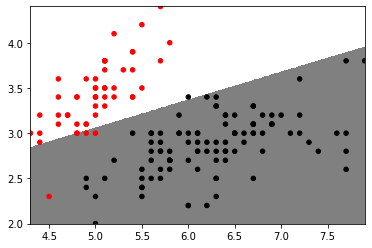

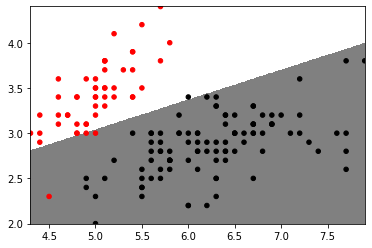

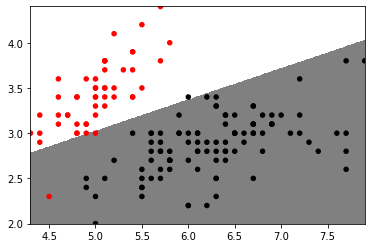

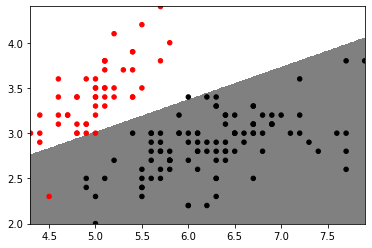

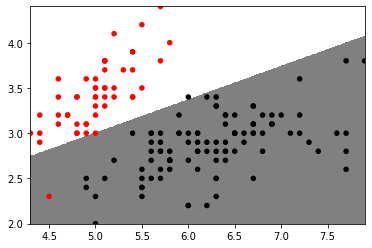

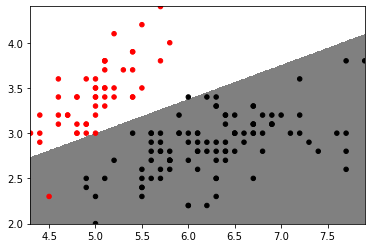

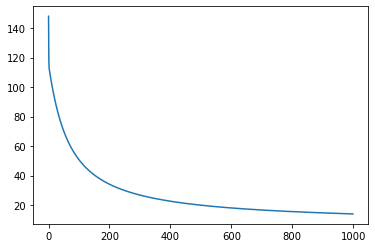

In [7]:
# logistic regression, batch gradient descent

# hyperparameter
eta = 1e-3
maxEpoch = 1000

cost = []

# initialize
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):
    # prediction
    a_pred = x.dot(w)
    y_pred = sigmoid(a_pred)

    # visualize
    if epoch % 100 == 0:
        drawLogistic(w, x, y_pred, t)
    
    # grad = np.zeros(3)
    # for n in range(N):
    #     grad += (y_pred[n] - t[n])*x[n,:].reshape(-1)
    grad = (y_pred - t).reshape(1,-1).dot(x).reshape(-1)
    w = w - eta*grad

    # cost = cross-entropy
    # t_n log y_n + (1 - t_n) log (1 - y_n)
    cost.append( - np.sum( t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred) ) )
    
plt.figure()
plt.plot(cost)